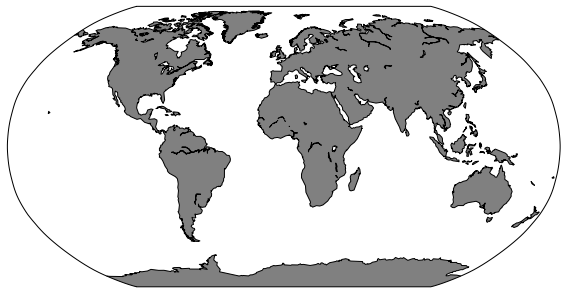

In [3]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4.5))
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.00)
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.fillcontinents(color='gray',lake_color='white')
m.drawcoastlines()
plt.savefig('world.png',dpi=75)

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.path import Path

fig = plt.figure(figsize=(8, 4.5))
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.00)

# MPL searches for ne_10m_land.shp in the directory 'D:\\ne_10m_land'
m = Basemap(projection='robin',lon_0=0,resolution='c')
shp_info = m.readshapefile('D:\\ne_10m_land', 'scalerank', drawbounds=True)
ax = plt.gca()
ax.cla()

paths = []
for line in shp_info[4]._paths:
    paths.append(Path(line.vertices, codes=line.codes))

coll = PathCollection(paths, linewidths=0, facecolors='grey', zorder=2)

m = Basemap(projection='robin',lon_0=0,resolution='c')
# drawing something seems necessary to 'initiate' the map properly
m.drawcoastlines(color='white', zorder=0)

ax = plt.gca()
ax.add_collection(coll)

plt.savefig('world.png',dpi=75)

OSError: cannot locate D:\ne_10m_land.shp

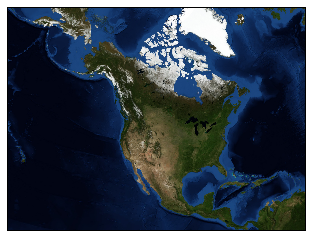

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

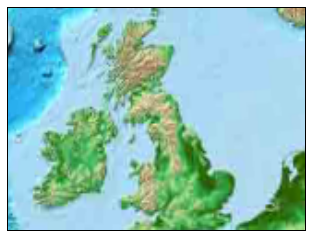

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=1200000,height=900000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=65,lat_0=55,lon_0=-3.)
m.etopo()
plt.show()


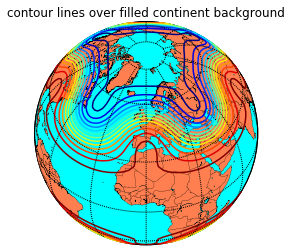

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=0,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()